## PAC,SHO,PAS,DRI,DEF,PHY,NAME,RANK,OVR,POS Bilgilerinin Elde Edilmesi

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC




In [5]:
pac_values = []
sho_values = []
pas_values = []
dri_values = []
def_values = []
phy_values = []
player_name_values = []
rank_values = []
ovr_values = []
pos_values = []

def scrape_page(url):
    # Tarayıcıyı başlatmak
    driver = webdriver.Chrome() 

    # Sayfayı açmak
    driver.get(url)

    # Butona Tıklamak
    filter_button_xpath = "//td[@class='Table_cell__pPV_v']//button"
    filter_button = driver.find_element(By.XPATH, filter_button_xpath)
    driver.execute_script("arguments[0].click();", filter_button)

    # Sayfanın yüklenmesini beklemek
    driver.implicitly_wait(10)


    for i in range(5):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(2)  # Her kaydırma işleminden sonra 2 saniye bekle

    # Sayfanın kaynak kodunu al
    page_source = driver.page_source

    # BeautifulSoup ile sayfanın kaynak kodunu analiz et
    soup = BeautifulSoup(page_source, 'html.parser')

      
    # İstatistik değerlerini sınıflara göre ayır
    for pac in soup.findAll("div", {"class": "Table_statCell__nUzfR generated_utility3sm__0pg6W generated_utility1lg__ECKe_ Table_groupedStatCell__UXXLR"}):
        value = pac.text.strip()

        if value.startswith("PAC"):
            pac_values.append(value)
        elif value.startswith("SHO"):
            sho_values.append(value)
        elif value.startswith("PAS"):
            pas_values.append(value)
        elif value.startswith("DRI"):
            dri_values.append(value)
        elif value.startswith("DEF"):
            def_values.append(value)
        elif value.startswith("PHY"):
            phy_values.append(value)


            
    # Farklı html kodunda olan "OVR" değerini bulmak  
    ovr_values = []
    for ovr in soup.find_all("div", {"class": "Table_statCell__nUzfR generated_utility3sm__0pg6W generated_utility1lg__ECKe_"}):
        value = ovr.text.strip()
        
        if value.startswith("OVR"):
            ovr_values.append(value)
            
   # Farklı html kodunda olan "POS" değerini bulmak   
    pos_values = []

    for pos in soup.find_all("a",{"class":"Table_centerCell__ns_Vv Table_anchorCell___jxM9"}):
        pos_values.append(pos.text.strip())

    # Oluşturulan liste
    pos_values = [value for value in pos_values if value]  # Boş olmayan elemanları filtrele
    print(pos_values)



    # Farklı html kodunda olan "RANK" değerini bulmak  
    rank_values = []
    for rank in soup.find_all("div", {"class": "generated_headline5__imvsB"}):
        value = rank.text.strip()      
        rank_values.append(value)

    # Farklı html kodunda olan "Player Name" değerini bulmak 
    player_name_values = []
    for player in soup.find_all("a", {"class": "Table_profileCellAnchor__VU0JH"}):
        value = player.text.strip()      
        player_name_values.append(value)
#-------------------------------------------------------------------------------
 # Çekilen değerlerden ön ekleri kaldırma işlemi
    # 'PAC' önekini kaldırma işlemi
    values_without_pac = [value.lstrip('PAC') for value in pac_values]
    ekstra_values_pac = []
    for value in values_without_pac:
        if len(value) == 4:
            ekstra_values_pac.append(value[:2])
        elif len(value) == 3:
            ekstra_values_pac.append(value[:2])
        elif len(value) == 2:
            ekstra_values_pac.append(value)
#-------------------------------------------------------------------------------
    # 'SHO' önekini kaldırma işlemi
    values_without_sho = [value.lstrip('SHO') for value in sho_values]
    ekstra_values_sho = []
    for value in values_without_sho:
        if len(value) == 4:
            ekstra_values_sho.append(value[:2])
        elif len(value) == 3:
            ekstra_values_sho.append(value[:2])
        elif len(value) == 2:
            ekstra_values_sho.append(value)
#-------------------------------------------------------------------------------
    # 'PAS' önekini kaldırma işlemi
    values_without_pas = [value.lstrip('PAS') for value in pas_values]
    ekstra_values_pas = []
    for value in values_without_pas:
        if len(value) == 4:
            ekstra_values_pas.append(value[:2])
        elif len(value) == 3:
            ekstra_values_pas.append(value[:2])
        elif len(value) == 2:
            ekstra_values_pas.append(value)
    print(ekstra_values_pas)
#-------------------------------------------------------------------------------
    # 'DRI' önekini kaldırma işlemi
    values_without_dri = [value.lstrip('DRI') for value in dri_values]
    ekstra_values_drı = []
    for value in values_without_dri:
        if len(value) == 4:
            ekstra_values_drı.append(value[:2])
        elif len(value) == 3:
            ekstra_values_drı.append(value[:2])
        elif len(value) == 2:
            ekstra_values_drı.append(value)
#-------------------------------------------------------------------------------
    # 'DEF' önekini kaldırma işlemi
    values_without_def = [value.lstrip("DEF") for value in def_values]

    # 2 ve 3 basamaklı sayıları ayırma işlemi

    ekstra_values_def = []
    for value in values_without_def:
        if len(value) == 4:
            ekstra_values_def.append(value[:2])
        elif len(value) == 3:
            ekstra_values_def.append(value[:2])
        elif len(value) == 2:
            ekstra_values_def.append(value)
#-------------------------------------------------------------------------------
    # 'PHY' önekini kaldırma işlemi
    values_without_phy = [value.lstrip("PHY") for value in phy_values]

    # 2 ve 3 basamaklı sayıları ayırma işlemi

    ekstra_values_phy = []
    for value in values_without_phy:
        if len(value) == 4:
            ekstra_values_phy.append(value[:2])
        elif len(value) == 3:
            ekstra_values_phy.append(value[:2])
        elif len(value) == 2:
            ekstra_values_phy.append(value)

#-------------------------------------------------------------------------------
    values_without_ovr = [value.lstrip('OVR') for value in ovr_values]

# Tarayıcıyı kapatmak
    driver.quit()

    return ( 
        values_without_pac,values_without_sho,values_without_pas,values_without_dri,values_without_def,
        values_without_phy,values_without_ovr,pos_values,rank_values,player_name_values
    )
# Tüm sonuçları ayrı ayrı dosyalara kaydetmek
all_results_pac= []
all_results_sho = []
all_results_pas = []  
all_results_dri = []
all_results_def = [] 
all_results_phy = [] 
all_results_ovr = [] 
all_results_pos = [] 
all_results_rank = [] 
all_results_player_name = [] 

# 174 Sayfa için döngü oluşturmak
                                            
for page_number in range(1,175):                                           
    pac_values = []
    sho_values = []
    pas_values = []
    dri_values = []
    def_values = []
    phy_values = []
    ovr_values = []
    pos_values = []
    rank_values = []
    player_name_values = [] 
    
    page_url = f"https://www.ea.com/games/ea-sports-fc/ratings?page={page_number}"
    (
        page_results_pac,
        page_results_sho, 
        page_results_pas, 
        page_results_dri,
        page_results_def,
        page_results_phy,
        page_results_ovr,
        page_results_pos,
        page_results_rank,
        page_results_player_name,
         
    ) = scrape_page(page_url)

    
    
    all_results_pac.extend(page_results_pac)
    all_results_sho.extend(page_results_sho)
    all_results_pas.extend(page_results_pas)
    all_results_dri.extend(page_results_dri)
    all_results_def.extend(page_results_def)
    all_results_phy.extend(page_results_phy)    
    all_results_ovr.extend(page_results_ovr)
    all_results_pos.extend(page_results_pos)
    all_results_rank.extend(page_results_rank)
    all_results_player_name.extend(page_results_player_name)
    
# Tüm sonuçları ayrı ayrı dosyalara kaydetmek
with open('all_results_pac.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_pac))

with open('all_results_sho.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_sho))

with open('all_results_pas.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_pas))

with open('all_results_dri.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_dri))

with open('all_results_def.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_def))

with open('all_results_phy.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_phy))

with open('all_results_ovr.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_ovr))

with open('all_results_pos.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_pos))

with open('all_results_rank.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_rank))

with open('all_results_player_name.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_player_name))
 
    

['ST', 'CM', 'ST', 'CM', 'CM', 'CF', 'ST', 'CF', 'GK', 'ST', 'RW', 'ST', 'RW', 'RW', 'CB', 'CB', 'LW', 'CDM', 'LW', 'ST', 'GK', 'CB', 'GK', 'ST', 'CDM', 'CB', 'CAM', 'CB', 'ST', 'ST', 'ST', 'CAM', 'CM', 'CM', 'ST', 'GK', 'LW', 'CDM', 'GK', 'GK', 'ST', 'CM', 'LB', 'CM', 'RB', 'CM', 'ST', 'RW', 'ST', 'CAM', 'GK', 'CDM', 'CAM', 'CB', 'GK', 'LW', 'CAM', 'GK', 'GK', 'GK', 'RW', 'LB', 'GK', 'RW', 'CM', 'LW', 'CM', 'LW', 'CB', 'CDM', 'RM', 'CM', 'CAM', 'CM', 'CAM', 'CB', 'CF', 'CM', 'ST', 'CM', 'LW', 'LB', 'CM', 'LB', 'CF', 'CM', 'CM', 'CB', 'CF', 'CDM', 'CM', 'ST', 'LB', 'ST', 'RB', 'RB', 'LW', 'GK', 'ST', 'LW']
['80', '80', '91', '91', '66', '66', '94', '94', '83', '83', '90', '90', '74', '74', '83', '83', '76', '76', '84', '84', '88', '88', '80', '80', '81', '81', '83', '83', '81', '81', '66', '66', '78', '78', '80', '80', '85', '85', '80', '80', '89', '89', '71', '71', '85', '85', '77', '77', '79', '79', '67', '67', '90', '90', '69', '69', '87', '87', '66', '66', '76', '76', '87', '87', '

# Sayfadaki Alt Liste Bilgilerinin Elde Edilmesi

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

# İstatistik değerlerini toplamak için listeler oluşturmak
diving_values=[]
handlig_values=[]
kicking_values=[]
gkpositioning_values=[]
gkreflexes_values=[]
acceleration_values = []
sprint_speed_values = []
positioning_values = []
finishing_values = []
shot_power_values = []
long_shots_values = []
volleys_values = []
penalties_values = []
vision_values = []
crossing_values = []
free_kick_accuracy_values = []
shot_passing_values = []
long_passing_values = []
curve_values = []
agility_values = []
balance_values = []
reactions_values = []
ball_control_values = []
detailed_dribbling_values = []
composure_values = []
interceptions_values = []
heading_accuracy_values = []
def_awareness_values = []
standing_tackle_values = []
sliding_tackle_values = []
jumping_values = []
stamina_values = []
strength_values = []
aggression_values = []
    
def scrape_page(url):
    # Tarayıcıyı başlatmak
    driver = webdriver.Chrome() 

    # Sayfayı açmak
    driver.get(url)

    # Alt Liste butonunu bulmak ve tıklamak
    filter_button_xpath = "//td[@class='Table_cell__pPV_v']//button"
    filter_button = driver.find_element(By.XPATH, filter_button_xpath)
    driver.execute_script("arguments[0].click();", filter_button)

    # Sayfanın yüklenmesini beklemek
    driver.implicitly_wait(10)

    for i in range(5):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(2)  # Her kaydırma işleminden sonra 2 saniye bekle

    # Sayfanın kaynak kodunu almak
    page_source = driver.page_source

    # BeautifulSoup ile sayfanın kaynak kodunu analiz etmek
    soup = BeautifulSoup(page_source, 'html.parser')

      
    # İstatistik değerlerini sınıflara göre ayırmak
    
    for title in soup.find_all("div", {"class": "Stat_stat__lh90p Stat_bar__hVgdN generated_utility3__mFgLe"}):
        value = title.text.strip()
        if value.startswith("GK Diving"):
            diving_values.append(value)
        elif value.startswith("GK Handling"):
            handlig_values.append(value)
        elif value.startswith("GK Kicking"):
            kicking_values.append(value)
        elif value.startswith("GK Positioning"):
            gkpositioning_values.append(value)
        elif value.startswith("GK Reflexes"):
            gkreflexes_values.append(value)
        # YUKARIDAKİ 5 TANE DEĞER İÇİN DÖNGÜ OLUŞRULAMADI.
        elif value.startswith("Acceleration"):
            acceleration_values.append(value)
        elif value.startswith("Sprint Speed"):
            sprint_speed_values.append(value)
        elif value.startswith("Positioning"):
            positioning_values.append(value)
        elif value.startswith("Finishing"):
            finishing_values.append(value)
        elif value.startswith("Shot Power"):
            shot_power_values.append(value)
        elif value.startswith("Long Shots"):
            long_shots_values.append(value)
        elif value.startswith("Volleys"):
            volleys_values.append(value)
        elif value.startswith("Penalties"):
            penalties_values.append(value)
        elif value.startswith("Vision"):
            vision_values.append(value)
        elif value.startswith("Crossing"):
            crossing_values.append(value)       
        elif value.startswith("Free Kick Accuracy"):
            free_kick_accuracy_values.append(value)        
        elif value.startswith("Shot Passing"):
            shot_passing_values.append(value)        
        elif value.startswith("Long Passing"):
            long_passing_values.append(value)          
        elif value.startswith("Curve"):
            curve_values.append(value)       
        elif value.startswith("Agility"):
            agility_values.append(value)
        elif value.startswith("Balance"):
            balance_values.append(value)        
        elif value.startswith("Reactions"):
            reactions_values.append(value)
        elif value.startswith("Ball Control"):
            ball_control_values.append(value)        
        elif value.startswith("Dribbling"):
            detailed_dribbling_values.append(value)         
        elif value.startswith("Composure"):
            composure_values.append(value)      
        elif value.startswith("Interceptions"):
            interceptions_values.append(value)
        elif value.startswith("Heading Accuracy"):
            heading_accuracy_values.append(value)
        elif value.startswith("Def Awareness"):
            def_awareness_values.append(value)
        elif value.startswith("Standing Tackle"):
            standing_tackle_values.append(value)
        elif value.startswith("Sliding Tackle"):
            sliding_tackle_values.append(value) 
        elif value.startswith("Jumping"):
            jumping_values.append(value)      
        elif value.startswith("Stamina"):
            stamina_values.append(value)
        elif value.startswith("Strength"):
            strength_values.append(value)        
        elif value.startswith("Aggression"):
            aggression_values.append(value)
        

# Elde edilen değerlerden ön ekleri kaldırma işlemi 
    values_without_diving = [value.lstrip('GK Diving') for value in diving_values]
    values_without_handling = [value.lstrip('GK Handling') for value in handlig_values]
    values_without_kicking = [value.lstrip('GK Kicking') for value in kicking_values]
    values_without_gkpositioning = [value.lstrip('GK Positioning') for value in gkpositioning_values]
    values_without_gkreflexes = [value.lstrip('GK Reflexes') for value in gkreflexes_values]
    
    values_without_acceleration = [value.lstrip('Acceleration') for value in acceleration_values]
    values_without_sprint_speed = [value.lstrip('Sprint Speed') for value in sprint_speed_values]
    values_without_positioning = [value.lstrip('Positioning') for value in positioning_values]
    values_without_finishing = [value.lstrip('Finishing') for value in finishing_values]
    values_without_shot_power = [value.lstrip('Shot Power') for value in shot_power_values]
    values_without_long_shots = [value.lstrip('Long Shots') for value in long_shots_values]
    values_without_volleys = [value.lstrip('Volleys') for value in volleys_values]
    values_without_penalties = [value.lstrip('Penalties') for value in penalties_values]
    values_without_vision = [value.lstrip('Vision') for value in vision_values]
    values_without_crossing = [value.lstrip('Crossing') for value in crossing_values]
    values_without_free_kick_accuracy = [value.lstrip('Free Kick Accuracy') for value in free_kick_accuracy_values]
    values_without_shot_passing = [value.lstrip('Shot Passing') for value in shot_passing_values]
    values_without_long_passing = [value.lstrip('Long Passing') for value in long_passing_values]
    values_without_curve = [value.lstrip('Curve') for value in curve_values]
    values_without_agility = [value.lstrip('Agility') for value in agility_values]
    values_without_balance = [value.lstrip('Balance') for value in balance_values]
    values_without_reactions = [value.lstrip('Reactions') for value in reactions_values]
    values_without_ball_control = [value.lstrip('Ball Control') for value in ball_control_values]
    values_without_detailed_dribbling = [value.lstrip('Dribbling') for value in detailed_dribbling_values]
    values_without_composure = [value.lstrip('Composure') for value in composure_values]
    values_without_interceptions = [value.lstrip('Interceptions') for value in interceptions_values]
    values_without_heading_accuracy = [value.lstrip('Heading Accuracy') for value in heading_accuracy_values]
    values_without_def_awareness = [value.lstrip('Def Awareness') for value in def_awareness_values]
    values_without_standing_tackle = [value.lstrip('Standing Tackle') for value in standing_tackle_values]
    values_without_sliding_tackle = [value.lstrip('Sliding Tackle') for value in sliding_tackle_values]
    values_without_jumping = [value.lstrip('Jumping') for value in jumping_values]
    values_without_stamina = [value.lstrip('Stamina') for value in stamina_values]
    values_without_strength = [value.lstrip('Strength') for value in strength_values]
    values_without_aggression = [value.lstrip('Aggression') for value in aggression_values]

# Tarayıcıyı kapatmak
    driver.quit()

    return (
        values_without_diving,values_without_handling,values_without_kicking,values_without_gkpositioning,
        values_without_gkreflexes,values_without_acceleration, values_without_sprint_speed, values_without_positioning,
        values_without_finishing, values_without_shot_power, values_without_long_shots,
        values_without_volleys, values_without_penalties, values_without_vision,
        values_without_crossing, values_without_free_kick_accuracy, values_without_shot_passing,
        values_without_long_passing, values_without_curve, values_without_agility,
        values_without_balance, values_without_reactions, values_without_ball_control,
        values_without_detailed_dribbling, values_without_composure, values_without_interceptions,
        values_without_heading_accuracy, values_without_def_awareness, values_without_standing_tackle,
        values_without_sliding_tackle, values_without_jumping, values_without_stamina,
        values_without_strength, values_without_aggression
    )
# Tüm sonuçları ayrı ayrı dosyalara kaydetmek
all_results_diving = []
all_results_handling = []
all_results_kicking = []
all_results_gkpositioning = []
all_results_gkreflexes = []
all_results_acceleration = []
all_results_sprint_speed = []
all_results_positioning = []  
all_results_finishing = []
all_results_shot_power = [] 
all_results_long_shots = []
all_results_volleys = []
all_results_penalties = [] 
all_results_vision = [] 
all_results_crossing = [] 
all_results_free_kick_accuracy = [] 
all_results_shot_passing = [] 
all_results_long_passing = []
all_results_curve = []
all_results_agility = [] 
all_results_balance = [] 
all_results_reactions = []
all_results_ball_control = [] 
all_results_detailed_dribbling = [] 
all_results_composure = [] 
all_results_interceptions = [] 
all_results_heading_accuracy = [] 
all_results_def_awareness = [] 
all_results_standing_tackle = []
all_results_sliding_tackle = [] 
all_results_jumping = [] 
all_results_stamina = []
all_results_strength = [] 
all_results_aggression = [] 



# 174 Sayfa İçin Döngü oluşturmak
for page_number in range(1, 175):
    diving_values = []
    handlig_values=[]
    kicking_values=[]
    gkpositioning_values=[]
    gkreflexes_values=[]
    acceleration_values = []
    sprint_speed_values = []
    positioning_values = []
    finishing_values = []
    shot_power_values = []
    long_shots_values = []
    volleys_values = []
    penalties_values = []
    vision_values = []
    crossing_values = []
    free_kick_accuracy_values = []
    shot_passing_values = []
    long_passing_values = []
    curve_values = []
    agility_values = []
    balance_values = []
    reactions_values = []
    ball_control_values = []
    detailed_dribbling_values = []
    composure_values = []
    interceptions_values = []
    heading_accuracy_values = []
    def_awareness_values = []
    standing_tackle_values = []
    sliding_tackle_values = []
    jumping_values = []
    stamina_values = []
    strength_values = []
    aggression_values = []
    
    page_url = f"https://www.ea.com/games/ea-sports-fc/ratings?page={page_number}"
    (
        page_results_diving,
        page_results_handlig,
        page_results_kickling,
        page_results_gkpositioning,
        page_results_gkreflexes,
        page_results_acceleration,
        page_results_sprint_speed,
        page_results_positioning, 
        page_results_finishing,
        page_results_shot_power,
        page_results_long_shots,
        page_results_volleys,
        page_results_penalties,
        page_results_vision, 
        page_results_crossing,
        page_results_free_kick_accuracy, 
        page_results_shot_passing, 
        page_results_long_passing, 
        page_results_curve,
        page_results_agility,
        page_results_balance, 
        page_results_reactions,
        page_results_ball_control, 
        page_results_detailed_dribbling, 
        page_results_composure, 
        page_results_interceptions,
        page_results_heading_accuracy, 
        page_results_def_awareness, 
        page_results_standing_tackle,
        page_results_sliding_tackle,
        page_results_jumping, 
        page_results_stamina, 
        page_results_strength, 
        page_results_aggression, 
    ) = scrape_page(page_url)

    
    all_results_diving.extend(page_results_diving)
    all_results_handling.extend(page_results_handlig)
    all_results_kicking.extend(page_results_kickling)
    all_results_gkpositioning.extend(page_results_gkpositioning)
    all_results_gkreflexes.extend(page_results_gkreflexes)
    all_results_acceleration.extend(page_results_acceleration)
    all_results_sprint_speed.extend(page_results_sprint_speed)
    all_results_positioning.extend(page_results_positioning)
    all_results_finishing.extend(page_results_finishing)
    all_results_shot_power.extend(page_results_shot_power)
    all_results_long_shots.extend(page_results_long_shots)
    all_results_volleys.extend(page_results_volleys)
    all_results_penalties.extend(page_results_penalties)
    all_results_vision.extend(page_results_vision) 
    all_results_crossing.extend(page_results_crossing)
    all_results_free_kick_accuracy.extend(page_results_free_kick_accuracy) 
    all_results_shot_passing.extend(page_results_shot_passing)
    all_results_long_passing.extend(page_results_long_passing) 
    all_results_curve.extend(page_results_curve)
    all_results_agility.extend(page_results_agility)
    all_results_balance.extend(page_results_balance)
    all_results_reactions.extend(page_results_reactions)
    all_results_ball_control.extend(page_results_ball_control)
    all_results_detailed_dribbling.extend( page_results_detailed_dribbling)
    all_results_composure.extend(page_results_composure)
    all_results_interceptions.extend(page_results_interceptions) 
    all_results_heading_accuracy.extend(page_results_heading_accuracy)
    all_results_def_awareness.extend(page_results_def_awareness)
    all_results_standing_tackle.extend(page_results_standing_tackle)
    all_results_sliding_tackle.extend(page_results_sliding_tackle)
    all_results_jumping.extend(page_results_jumping)
    all_results_stamina.extend(page_results_stamina)
    all_results_strength.extend(page_results_strength)
    all_results_aggression.extend(page_results_aggression)

    
# Tüm sonuçları ayrı ayrı dosyalara kaydetmek
with open('all_results_diving.txt', 'w') as file:
    file.write('\n'.join(all_results_diving))

with open('all_results_handling.txt', 'w') as file:
    file.write('\n'.join(all_results_handling))

with open('all_results_kicking.txt', 'w') as file:
    file.write('\n'.join(all_results_kicking))

with open('all_results_gkpositioning.txt', 'w') as file:
    file.write('\n'.join(all_results_gkpositioning))

with open('all_results_gkreflexes.txt', 'w') as file:
    file.write('\n'.join(all_results_gkreflexes))
    
with open('all_results_acceleration.txt', 'w') as file:
    file.write('\n'.join(all_results_acceleration))

with open('all_results_sprint_speed.txt', 'w') as file:
    file.write('\n'.join(all_results_sprint_speed))

with open('all_results_positioning.txt', 'w') as file:
    file.write('\n'.join(all_results_positioning))

with open('all_results_finishing.txt', 'w') as file:
    file.write('\n'.join(all_results_finishing))
    
with open('all_results_shot_power.txt', 'w') as file:
    file.write('\n'.join(all_results_shot_power))
    
with open('all_results_long_shots.txt', 'w') as file:
    file.write('\n'.join(all_results_long_shots))
    
with open('all_results_volleys.txt', 'w') as file:
    file.write('\n'.join(all_results_volleys))
    
with open('all_results_penalties.txt', 'w') as file:
    file.write('\n'.join(all_results_penalties))
    
with open('all_results_vision.txt', 'w') as file:
    file.write('\n'.join(all_results_vision))
    
with open('all_results_crossing.txt', 'w') as file:
    file.write('\n'.join(all_results_crossing))
    
with open('all_results_free_kick_accuracy.txt', 'w') as file:
    file.write('\n'.join(all_results_free_kick_accuracy))
    
with open('all_results_shot_passing.txt', 'w') as file:
    file.write('\n'.join(all_results_shot_passing))
    
with open('all_results_long_passing.txt', 'w') as file:
    file.write('\n'.join(all_results_long_passing))
    
with open('all_results_curve.txt', 'w') as file:
    file.write('\n'.join(all_results_curve))
    
with open('all_results_agility.txt', 'w') as file:
    file.write('\n'.join(all_results_agility))
    
with open('all_results_balance.txt', 'w') as file:
    file.write('\n'.join(all_results_balance))
    
with open('all_results_reactions.txt', 'w') as file:
    file.write('\n'.join(all_results_reactions))
    
with open('all_results_ball_control.txt', 'w') as file:
    file.write('\n'.join(all_results_ball_control))
    
with open('all_results_detailed_dribbling.txt', 'w') as file:
    file.write('\n'.join(all_results_detailed_dribbling))
    
with open('all_results_composure.txt', 'w') as file:
    file.write('\n'.join(all_results_composure))
    
with open('all_results_interceptions.txt', 'w') as file:
    file.write('\n'.join(all_results_interceptions))
    
with open('all_results_heading_accuracy.txt', 'w') as file:
    file.write('\n'.join(all_results_heading_accuracy))
    
with open('all_results_def_awareness.txt', 'w') as file:
    file.write('\n'.join(all_results_def_awareness))
    
with open('all_results_standing_tackle.txt', 'w') as file:
    file.write('\n'.join(all_results_standing_tackle))
    
with open('all_results_sliding_tackle.txt', 'w') as file:
    file.write('\n'.join(all_results_sliding_tackle))
    
with open('all_results_jumping.txt', 'w') as file:
    file.write('\n'.join(all_results_jumping))
    
with open('all_results_stamina.txt', 'w') as file:
    file.write('\n'.join(all_results_stamina))
    
with open('all_results_strength.txt', 'w') as file:
    file.write('\n'.join(all_results_strength))
    
with open('all_results_aggression.txt', 'w') as file:
    file.write('\n'.join(all_results_aggression))



Özellikler

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

att_work_rate = []
def_work_rate = []
foot = []
age = []
league = []
team = []
height = []
weight = []
nation = []

def scrape_page(url):
    # Tarayıcıyı başlatmak
    driver = webdriver.Chrome() 

    # Sayfayı açmak
    driver.get(url)

    # Alt Liste butonunu bulmak ve tıklamak
    filter_button_xpath = "//td[@class='Table_cell__pPV_v']//button"
    filter_button = driver.find_element(By.XPATH, filter_button_xpath)
    driver.execute_script("arguments[0].click();", filter_button)

    # Sayfanın yüklenmesini beklemek
    driver.implicitly_wait(10)

    for i in range(5):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(2)  # Her kaydırma işleminden sonra 2 saniye bekle

    # Sayfanın kaynak kodunu almak
    page_source = driver.page_source

    # BeautifulSoup ile sayfanın kaynak kodunu analiz etmek
    soup = BeautifulSoup(page_source, 'html.parser')

    att_work_rate = []
    def_work_rate = []
    foot = []
    age = []
    league = []
    team = []
    height = []
    weight = []
    nation = []

    for i in soup.findAll("div", {"class": "Attribute_attribute__HF1Ww generated_utility2__1zAUs"}):
        text = i.text.strip()
        if text.startswith("ATT WORK RATE"):
            att_work_rate.append(text.replace("ATT WORK RATE", ""))
        elif text.startswith("DEF WORK RATE"):
            def_work_rate.append(text.replace("DEF WORK RATE", ""))
        elif text.startswith("PREFERRED FOOT"):
            foot.append(text.replace("PREFERRED FOOT", ""))
        elif text.startswith("AGE"):
            age.append(text.replace("AGE", ""))
        elif text.startswith("LEAGUE"):
            league.append(text.replace("LEAGUE", ""))
        elif text.startswith("TEAM"):
            team.append(text.replace("TEAM", ""))
        elif text.startswith("HEIGHT"):
            height.append(text.replace("HEIGHT", "").split()[0])
        elif text.startswith("WEIGHT"):
            weight.append(text.replace("WEIGHT", "").split()[0])
        elif text.startswith("NATION"):
            nation.append(text.replace("NATION", ""))

    # Tarayıcıyı kapatmak
    driver.quit()

    return att_work_rate, def_work_rate, foot, age, league, team, height, weight, nation

all_results_att_work_rate = []
all_results_def_work_rate = []
all_results_foot = []
all_results_age = []
all_results_league = []
all_results_team = []
all_results_height = []
all_results_weight = []  
all_results_nation = []

from selenium.common.exceptions import WebDriverException

# 174 Sayfa için döngü oluşturmak
for page_number in range(1, 175):
    try:
        att_work_rate = [] # Reset the lists before each iteration
        def_work_rate = []
        foot = []
        age = []
        league = []
        team = []
        height = []
        weight = []
        nation = []

        page_url = f"https://www.ea.com/games/ea-sports-fc/ratings?page={page_number}"
        (
            page_results_att_work_rate,
            page_results_def_work_rate,
            page_results_foot,
            page_results_age,
            page_results_league,
            page_results_team,
            page_results_height,
            page_results_weight, 
            page_results_nation,
        ) = scrape_page(page_url)
        
        all_results_att_work_rate.extend(page_results_att_work_rate)
        all_results_def_work_rate.extend(page_results_def_work_rate)
        all_results_foot.extend(page_results_foot)
        all_results_age.extend(page_results_age)
        all_results_league.extend(page_results_league)
        all_results_team.extend(page_results_team)
        all_results_height.extend(page_results_height)
        all_results_weight.extend(page_results_weight)
        all_results_nation.extend(page_results_nation)

    except WebDriverException as e:
        print(f"Error occurred at page {page_number}: {e}")



In [2]:
# Tüm sonuçları ayrı ayrı dosyalara kaydetmek
with open('all_results_att_work_rate.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_att_work_rate))

with open('all_results_def_work_rate.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_def_work_rate))

with open('all_results_foot.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_foot))

with open('all_results_age.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_age))

with open('all_results_league.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_league))

with open('all_results_team.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_team))

with open('all_results_height.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_height))

with open('all_results_weight.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_weight))

with open('all_results_nation.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_nation))


# DataFrame Oluşturmak

## Duplicate Gelen Featureları Düzeltme İşlemleri ( PAC, SHO,PAS,DRI,DEF,PHY,OVR)

In [6]:
import pandas as pd 

# Dosyadan veriyi oku
with open('all_results_pac.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
pac_filtered_lines = pd.DataFrame({'PAC': filtered_lines})

pac_filtered_lines

,PAC
0,97
1,82
2,89
3,722
4,81
...,...
17321,62
17322,61
17323,56
17324,58


In [7]:
# Dosyadan veriyi oku
with open('all_results_sho.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
sho_filtered_lines = pd.DataFrame({'SHO': filtered_lines})

sho_filtered_lines

,SHO
0,901
1,90
2,932
3,88
4,84
...,...
17321,26
17322,37
17323,34
17324,28


In [9]:
# Dosyadan veriyi oku
with open('all_results_pas.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
pas_filtered_lines = pd.DataFrame({'PAS': filtered_lines})

pas_filtered_lines

,PAS
0,80
1,91
2,661
3,941
4,83
...,...
17321,34
17322,45
17323,43
17324,33


In [10]:
# Dosyadan veriyi oku
with open('all_results_dri.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
dri_filtered_lines = pd.DataFrame({'DRİ': filtered_lines})

dri_filtered_lines

,DRİ
0,92
1,92
2,80
3,87
4,91
...,...
17321,42
17322,48
17323,45
17324,39


In [11]:
# Dosyadan veriyi oku
with open('all_results_def.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
def_filtered_lines = pd.DataFrame({'DEF': filtered_lines})

def_filtered_lines

,DEF
0,36
1,72
2,454
3,651
4,75
...,...
17321,43
17322,43
17323,43
17324,49


In [12]:
# Dosyadan veriyi oku
with open('all_results_phy.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
phy_filtered_lines = pd.DataFrame({'PHY': filtered_lines})

phy_filtered_lines


,PHY
0,782
1,78
2,881
3,781
4,73
...,...
17321,57
17322,47
17323,51
17324,48


In [13]:
# Dosyadan veriyi oku
with open('all_results_ovr.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
ovr_filtered_lines = pd.DataFrame({'OVR': filtered_lines})

ovr_filtered_lines

,OVR
0,91
1,91
2,91
3,91
4,90
...,...
17321,47
17322,47
17323,47
17324,47


In [18]:
# Her bir dosyayı oku
df_acceleration = pd.read_csv('all_results_acceleration.txt', header=None, names=['Acceleration'])
df_sprint_speed = pd.read_csv('all_results_sprint_speed.txt', header=None, names=['Sprint Speed'])
df_positioning = pd.read_csv('all_results_positioning.txt', header=None, names=['Positioning'])
# positioning df doğru gelmediği için df'e eklenemedi
df_finishing = pd.read_csv('all_results_finishing.txt', header=None, names=['Finishing'])
df_shot_power = pd.read_csv('all_results_shot_power.txt',header=None, names=['Shot Power'] )  
df_long_shots = pd.read_csv('all_results_long_shots.txt',header=None, names=['Long Shots']  )    
df_volleys = pd.read_csv('all_results_volleys.txt',header=None, names=['Volleys'] )
df_penalties = pd.read_csv('all_results_penalties.txt',header=None, names=['Penalties'])   
df_vision = pd.read_csv('all_results_vision.txt',header=None, names=['Vision'] )    
df_crossing= pd.read_csv('all_results_crossing.txt',header=None, names=['Crossing']) 
df_kick = pd.read_csv('all_results_free_kick_accuracy.txt',header=None, names=['Free Kick Accuracy'])
df_shot_passing = pd.read_csv('all_results_shot_passing.txt',header=None, names=['Shot Passing'])
df_long_passing = pd.read_csv('all_results_long_passing.txt',header=None,names=['Long Passing'])
df_curve = pd.read_csv('all_results_curve.txt',header=None,names=['Curve'])
df_agility = pd.read_csv('all_results_agility.txt',header=None,names=['Agility'])
df_balance = pd.read_csv('all_results_balance.txt',header=None,names=['Balance'])   
df_reactions= pd.read_csv('all_results_reactions.txt',header=None,names=['Reactions'])
df_ball_control = pd.read_csv('all_results_ball_control.txt',header=None,names=['Ball Control'])
df_detail_dribbling = pd.read_csv('all_results_detailed_dribbling.txt',header=None,names=['Detailed Dribbling'])   
df_composure = pd.read_csv('all_results_composure.txt',header=None,names=['Composure'])
df_interception = pd.read_csv('all_results_interceptions.txt',header=None,names=['Interception'])    
df_heading= pd.read_csv ('all_results_heading_accuracy.txt',header=None,names=['Heading Accuracy'])
df_def_awareness = pd.read_csv('all_results_def_awareness.txt',header=None,names=['Def Awareness'])
df_standing_tackle = pd.read_csv('all_results_standing_tackle.txt',header=None,names=['Standing Tackle'])
df_sliding_tackle =  pd.read_csv('all_results_sliding_tackle.txt',header=None,names=['Sliding Tackle'])
df_jumping = pd.read_csv('all_results_jumping.txt',header=None,names=['Jumping'])
df_stamina = pd.read_csv('all_results_stamina.txt',header=None,names=['Stamina'])   
df_strenght = pd.read_csv('all_results_strength.txt',header=None,names=['Strength'])
df_aggression = pd.read_csv('all_results_aggression.txt',header=None,names=['Aggression'])
df_rank = pd.read_csv('all_results_rank.txt',header=None,names=['Rank'])
df_player_name = pd.read_csv('all_results_player_name.txt',header=None,names=['Player Name'])
df_pos = pd.read_csv('all_results_pos.txt',header=None,names=['Position'])
df_age = pd.read_csv('all_resuLts_age.txt',header=None,names=['Age'])
df_att_work_rate = pd.read_csv('all_results_att_work_rate.txt',header=None,names=['Att_Work_Rate'])
df_def_work_rate = pd.read_csv('all_results_def_work_rate.txt',header=None,names=['Def_Work_Rate'])
df_foot = pd.read_csv('all_results_foot.txt',header=None,names=['Foot'])
df_height = pd.read_csv('all_results_height.txt',header=None,names=['Height'])
df_league = pd.read_csv('all_results_league.txt',header=None,names=['League'])
df_nation = pd.read_csv('all_results_nation.txt',header=None,names=['Nation'])
df_team = pd.read_csv('all_results_team.txt',header=None,names=['Team'])
df_weight = pd.read_csv('all_results_weight.txt',header=None,names=['Weight'])
   
# Tüm verileri birleştir
df_all = pd.concat([df_positioning,
                    df_rank,
                    df_player_name,
                    ovr_filtered_lines,
                    pac_filtered_lines,
                    sho_filtered_lines,
                    pas_filtered_lines,
                    dri_filtered_lines,
                    def_filtered_lines,
                    phy_filtered_lines,
                    df_pos,
                    df_acceleration,
                    df_sprint_speed,
                    df_finishing,
                    df_shot_power,
                    df_long_shots,
                    df_volleys,
                    df_penalties,
                    df_vision,
                    df_crossing,
                    df_kick,
                    df_shot_passing ,
                    df_long_passing ,
                    df_curve,
                    df_agility,
                    df_balance,
                    df_reactions,
                    df_ball_control,
                    df_detail_dribbling,
                    df_composure,
                    df_interception,
                    df_heading,
                    df_def_awareness,
                    df_standing_tackle,
                    df_sliding_tackle,
                    df_jumping,
                    df_stamina,
                    df_strenght,
                    df_aggression,
                    df_age,
                    df_att_work_rate,
                    df_def_work_rate,
                    df_age,df_foot,
                    df_height,
                    df_league,
                    df_nation,
                    df_team,
                    df_weight], axis=1)

## Not: Pos df'e eklenmedi !!! Veriler karışık gelmiş, düzeltilip eklenecek.

                            
print(df_all.head())

# DataFrame'i CSV dosyasına kaydet
df_all.to_csv('FC24_PLAYER_RATINGS_NEW1.csv', index=False)


   Positioning  Rank      Player Name OVR  PAC  SHO  PAS DRİ  DEF  PHY  ...  \
0           93     1    Kylian Mbappé  91   97  901   80  92   36  782  ...   
1           91     2  Alexia Putellas  91   82   90   91  92   72   78  ...   
2           96     3   Erling Haaland  91   89  932  661  80  454  881  ...   
3           88     4  Kevin De Bruyne  91  722   88  941  87  651  781  ...   
4           91     5   Aitana Bonmatí  90   81   84   83  91   75   73  ...   

   Age  Att_Work_Rate  Def_Work_Rate  Age   Foot  Height             League  \
0   24           High            Low   24  Right   182CM  Ligue 1 Uber Eats   
1   29           High         Medium   29   Left   173CM             Liga F   
2   23           High         Medium   23   Left   195CM     Premier League   
3   32           High         Medium   32  Right   181CM     Premier League   
4   25           High           High   25  Right   161CM             Liga F   

    Nation             Team  Weight  
0   France  

In [19]:
df_all

,Positioning,Rank,Player Name,OVR,PAC,SHO,PAS,DRİ,DEF,PHY,...,Age,Att_Work_Rate,Def_Work_Rate,Age,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,901,80,92,36,782,...,24,High,Low,24,Right,182CM,Ligue 1 Uber Eats,France,Paris SG,75KG
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,...,29,High,Medium,29,Left,173CM,Liga F,Spain,FC Barcelona,67KG
2,96,3,Erling Haaland,91,89,932,661,80,454,881,...,23,High,Medium,23,Left,195CM,Premier League,Norway,Manchester City,94KG
3,88,4,Kevin De Bruyne,91,722,88,941,87,651,781,...,32,High,Medium,32,Right,181CM,Premier League,Belgium,Manchester City,75KG
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,...,25,High,High,25,Right,161CM,Liga F,Spain,FC Barcelona,51KG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,41,17318,Deven Sawhney,47,62,26,34,42,43,57,...,21,High,Medium,21,Left,179CM,Hero ISL,India,Odisha FC,70KG
17322,38,17318,Wang Tengda,47,61,37,45,48,43,47,...,22,Medium,Medium,22,Right,178CM,CSL,China PR,Dalian Pro,66KG
17323,37,17318,Wu Yuhang,47,56,34,43,45,43,51,...,22,Medium,Medium,22,Right,182CM,CSL,China PR,Zhejiang Pro,75KG
17324,28,17318,Ye Daoxin,47,58,28,33,39,49,48,...,18,Medium,Medium,18,Right,175CM,CSL,China PR,Zhejiang Pro,70KG


In [20]:
df_all.isna().sum()

Positioning           0
Rank                  0
Player Name           0
OVR                   0
PAC                   0
SHO                   0
PAS                   0
DRİ                   0
DEF                   0
PHY                   0
Position              0
Acceleration          0
Sprint Speed          0
Finishing             0
Shot Power            0
Long Shots            0
Volleys               0
Penalties             0
Vision                0
Crossing              0
Free Kick Accuracy    0
Shot Passing          0
Long Passing          0
Curve                 0
Agility               0
Balance               0
Reactions             0
Ball Control          0
Detailed Dribbling    0
Composure             0
Interception          0
Heading Accuracy      0
Def Awareness         0
Standing Tackle       0
Sliding Tackle        0
Jumping               0
Stamina               0
Strength              0
Aggression            0
Age                   0
Att_Work_Rate         0
Def_Work_Rate   

# GOALKEEPING Kategorisindeki Bilgilerin Elde Edilmesi

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
from selenium.common.exceptions import WebDriverException

# İstatistik değerlerini toplamak için listeler oluştur
gkdiving_values = []
gkhandling_values = []
gkkicking_values = []
gkpositioning_values = []
gkreflexes_values = []

gk_pac_values = []
gk_sho_values = []
gk_pas_values = []
gk_dri_values = []
gk_def_values = []
gk_phy_values = []
gk_player_name_values = []
gk_rank_values = []
gk_ovr_values = []
gk_pos_values = []

gk_acceleration_values = []
gk_sprint_speed_values = []
gk_positioning_values = []
gk_finishing_values = []
gk_shot_power_values = []
gk_long_shots_values = []
gk_volleys_values = []
gk_penalties_values = []
gk_vision_values = []
gk_crossing_values = []
gk_free_kick_accuracy_values = []
gk_shot_passing_values = []
gk_long_passing_values = []
gk_curve_values = []
gk_agility_values = []
gk_balance_values = []
gk_reactions_values = []
gk_ball_control_values = []
gk_detailed_dribbling_values = []
gk_composure_values = []
gk_interceptions_values = []
gk_heading_accuracy_values = []
gk_def_awareness_values = []
gk_standing_tackle_values = []
gk_sliding_tackle_values = []
gk_jumping_values = []
gk_stamina_values = []
gk_strength_values = []
gk_aggression_values = []

gk_att_work_rate = []
gk_def_work_rate = []
gk_foot = []
gk_age = []
gk_league = []
gk_team = []
gk_height = []
gk_weight = []
gk_nation = []

url = "https://www.ea.com/games/ea-sports-fc/ratings?position=0"

    
def scrape_page(url):
    # Tarayıcıyı başlat
    driver = webdriver.Chrome() 

    # Sayfayı aç
    driver.get(url)

    # Filtre butonunu bul ve tıkla
    filter_button_xpath = "//td[@class='Table_cell__pPV_v']//button"
    filter_button = driver.find_element(By.XPATH, filter_button_xpath)
    driver.execute_script("arguments[0].click();", filter_button)

    # Sayfanın yüklenmesini bekle
    driver.implicitly_wait(10)

    # Sonuçları tutacak bir liste oluştur
    results = []

    for i in range(5):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(2)  # Her kaydırma işleminden sonra 2 saniye bekle

    # Sayfanın kaynak kodunu al
    page_source = driver.page_source

    # BeautifulSoup ile sayfanın kaynak kodunu analiz et
    soup = BeautifulSoup(page_source, 'html.parser')

      
    # İstatistik değerlerini sınıflara göre ayır
    for title in soup.find_all("div", {"class": "Stat_stat__lh90p Stat_bar__hVgdN generated_utility3__mFgLe"}):
        value = title.text.strip()

        if value.startswith("GK DIVING"):
            gkdiving_values.append(value)
        elif value.startswith("GK HANDLING"):
            gkhandling_values.append(value)
        elif value.startswith("GK KICKING"):
            gkkicking_values.append(value)
        elif value.startswith("GK POSITIONING"):
            gkpositioning_values.append(value)
        elif value.startswith("GK REFLEXES"):
            gkreflexes_values.append(value)
        elif value.startswith("Acceleration"):
            gk_acceleration_values.append(value)
        elif value.startswith("Sprint Speed"):
            gk_sprint_speed_values.append(value)
        elif value.startswith("Positioning"):
            gk_positioning_values.append(value)
        elif value.startswith("Finishing"):
            gk_finishing_values.append(value)
        elif value.startswith("Shot Power"):
            gk_shot_power_values.append(value)
        elif value.startswith("Long Shots"):
            gk_long_shots_values.append(value)
        elif value.startswith("Volleys"):
            gk_volleys_values.append(value)
        elif value.startswith("Penalties"):
            gk_penalties_values.append(value)
        elif value.startswith("Vision"):
            gk_vision_values.append(value)
        elif value.startswith("Crossing"):
            gk_crossing_values.append(value)       
        elif value.startswith("Free Kick Accuracy"):
            gk_free_kick_accuracy_values.append(value)        
        elif value.startswith("Shot Passing"):
            gk_shot_passing_values.append(value)        
        elif value.startswith("Long Passing"):
            gk_long_passing_values.append(value)          
        elif value.startswith("Curve"):
            gk_curve_values.append(value)       
        elif value.startswith("Agility"):
            gk_agility_values.append(value)
        elif value.startswith("Balance"):
            gk_balance_values.append(value)        
        elif value.startswith("Reactions"):
            gk_reactions_values.append(value)
        elif value.startswith("Ball Control"):
            gk_ball_control_values.append(value)        
        elif value.startswith("Dribbling"):
            gk_detailed_dribbling_values.append(value)         
        elif value.startswith("Composure"):
            gk_composure_values.append(value)      
        elif value.startswith("Interceptions"):
            gk_interceptions_values.append(value)
        elif value.startswith("Heading Accuracy"):
            gk_heading_accuracy_values.append(value)
        elif value.startswith("Def Awareness"):
            gk_def_awareness_values.append(value)
        elif value.startswith("Standing Tackle"):
            gk_standing_tackle_values.append(value)
        elif value.startswith("Sliding Tackle"):
            gk_sliding_tackle_values.append(value) 
        elif value.startswith("Jumping"):
            gk_jumping_values.append(value)      
        elif value.startswith("Stamina"):
            gk_stamina_values.append(value)
        elif value.startswith("Strength"):
            gk_strength_values.append(value)        
        elif value.startswith("Aggression"):
            gk_aggression_values.append(value)
        
        

    for pac in soup.findAll("div", {"class": "Table_statCell__nUzfR generated_utility3sm__0pg6W generated_utility1lg__ECKe_ Table_groupedStatCell__UXXLR"}):
        value = pac.text.strip()

        if value.startswith("PAC"):
            gk_pac_values.append(value)
        elif value.startswith("SHO"):
            gk_sho_values.append(value)
        elif value.startswith("PAS"):
            gk_pas_values.append(value)
        elif value.startswith("DRI"):
            gk_dri_values.append(value)
        elif value.startswith("DEF"):
            gk_def_values.append(value)
        elif value.startswith("PHY"):
            gk_phy_values.append(value)

# Farklı html kodunda olan "OVR" değerini bulmak  
    gk_ovr_values = []
    for ovr in soup.find_all("div", {"class": "Table_statCell__nUzfR generated_utility3sm__0pg6W generated_utility1lg__ECKe_"}):
        value = ovr.text.strip()
        
        if value.startswith("OVR"):
            gk_ovr_values.append(value)
            
   # Farklı html kodunda olan "POS" değerini bulmak   
    gk_pos_values = []

    for pos in soup.find_all("a",{"class":"Table_centerCell__ns_Vv Table_anchorCell___jxM9"}):
        gk_pos_values.append(pos.text.strip())

    # Oluşturulan liste
    gk_pos_values = [value for value in gk_pos_values if value]  # Boş olmayan elemanları filtrele
    print(gk_pos_values)



    # Farklı html kodunda olan "RANK" değerini bulmak  
    gk_rank_values = []
    for rank in soup.find_all("div", {"class": "generated_headline5__imvsB"}):
        value = rank.text.strip()      
        gk_rank_values.append(value)

    # Farklı html kodunda olan "Player Name" değerini bulmak 
    gk_player_name_values = []
    for player in soup.find_all("a", {"class": "Table_profileCellAnchor__VU0JH"}):
        value = player.text.strip()      
        gk_player_name_values.append(value)


#-------------------------------------------------------------------------------
 # Çekilen değerlerden ön ekleri kaldırma işlemi
    # 'PAC' önekini kaldırma işlemi
    values_without_gk_pac = [value.lstrip('PAC') for value in gk_pac_values]
    ekstra_values_gk_pac = []
    for value in values_without_gk_pac:
        if len(value) == 4:
            ekstra_values_gk_pac.append(value[:2])
        elif len(value) == 3:
            ekstra_values_gk_pac.append(value[:2])
        elif len(value) == 2:
            ekstra_values_gk_pac.append(value)
#-------------------------------------------------------------------------------
    # 'SHO' önekini kaldırma işlemi
    values_without_gk_sho = [value.lstrip('SHO') for value in gk_sho_values]
    ekstra_values_gk_sho = []
    for value in values_without_gk_sho:
        if len(value) == 4:
            ekstra_values_gk_sho.append(value[:2])
        elif len(value) == 3:
            ekstra_values_gk_sho.append(value[:2])
        elif len(value) == 2:
            ekstra_values_gk_sho.append(value)
#-------------------------------------------------------------------------------
    # 'PAS' önekini kaldırma işlemi
    values_without_gk_pas = [value.lstrip('PAS') for value in gk_pas_values]
    ekstra_values_gk_pas = []
    for value in values_without_gk_pas:
        if len(value) == 4:
            ekstra_values_gk_pas.append(value[:2])
        elif len(value) == 3:
            ekstra_values_gk_pas.append(value[:2])
        elif len(value) == 2:
            ekstra_values_gk_pas.append(value)
#-------------------------------------------------------------------------------
    # 'DRI' önekini kaldırma işlemi
    values_without_gk_dri = [value.lstrip('DRI') for value in gk_dri_values]
    ekstra_values_gk_drı = []
    for value in values_without_gk_dri:
        if len(value) == 4:
            ekstra_values_gk_drı.append(value[:2])
        elif len(value) == 3:
            ekstra_values_gk_drı.append(value[:2])
        elif len(value) == 2:
            ekstra_values_gk_drı.append(value)
#-------------------------------------------------------------------------------
    # 'DEF' önekini kaldırma işlemi
    values_without_gk_def = [value.lstrip("DEF") for value in gk_def_values]

    # 2 ve 3 basamaklı sayıları ayırma işlemi

    ekstra_values_gk_def = []
    for value in values_without_gk_def:
        if len(value) == 4:
            ekstra_values_gk_def.append(value[:2])
        elif len(value) == 3:
            ekstra_values_gk_def.append(value[:2])
        elif len(value) == 2:
            ekstra_values_gk_def.append(value)
#-------------------------------------------------------------------------------
    # 'PHY' önekini kaldırma işlemi
    values_without_gk_phy = [value.lstrip("PHY") for value in gk_phy_values]

    # 2 ve 3 basamaklı sayıları ayırma işlemi

    ekstra_values_gk_phy = []
    for value in values_without_gk_phy:
        if len(value) == 4:
            ekstra_values_gk_phy.append(value[:2])
        elif len(value) == 3:
            ekstra_values_gk_phy.append(value[:2])
        elif len(value) == 2:
            ekstra_values_gk_phy.append(value)

#-------------------------------------------------------------------------------
    for i in soup.findAll("div", {"class": "Attribute_attribute__HF1Ww generated_utility2__1zAUs"}):
        text = i.text.strip()
        if text.startswith("ATT WORK RATE"):
            gk_att_work_rate.append(text.replace("ATT WORK RATE", ""))
        elif text.startswith("DEF WORK RATE"):
            gk_def_work_rate.append(text.replace("DEF WORK RATE", ""))
        elif text.startswith("PREFERRED FOOT"):
            gk_foot.append(text.replace("PREFERRED FOOT", ""))
        elif text.startswith("AGE"):
            gk_age.append(text.replace("AGE", ""))
        elif text.startswith("LEAGUE"):
            gk_league.append(text.replace("LEAGUE", ""))
        elif text.startswith("TEAM"):
            gk_team.append(text.replace("TEAM", ""))
        elif text.startswith("HEIGHT"):
            gk_height.append(text.replace("HEIGHT", "").split()[0])
        elif text.startswith("WEIGHT"):
            gk_weight.append(text.replace("WEIGHT", "").split()[0])
        elif text.startswith("NATION"):
            gk_nation.append(text.replace("NATION", ""))


 # önekleri kaldırma işlemi
    values_without_gkdiving = [value.lstrip('GK DIVING') for value in gkdiving_values]
    values_without_gkhandling = [value.lstrip('GK HANDLING') for value in gkhandling_values]
    values_without_gkkicking = [value.lstrip('GK KICKING') for value in gkkicking_values]
    values_without_gkpositioning = [value.lstrip('GK POSITIONING') for value in gkpositioning_values]
    values_without_gkreflexes = [value.lstrip('GK REFLEXES') for value in gkreflexes_values]
    values_without_gk_ovr = [value.lstrip('OVR') for value in gk_ovr_values]

    values_without_gk_acceleration = [value.lstrip('Acceleration') for value in gk_acceleration_values]
    values_without_gk_sprint_speed = [value.lstrip('Sprint Speed') for value in gk_sprint_speed_values]
    values_without_gk_positioning = [value.lstrip('Positioning') for value in gk_positioning_values]
    values_without_gk_finishing = [value.lstrip('Finishing') for value in gk_finishing_values]
    values_without_gk_shot_power = [value.lstrip('Shot Power') for value in gk_shot_power_values]
    values_without_gk_long_shots = [value.lstrip('Long Shots') for value in gk_long_shots_values]
    values_without_gk_volleys = [value.lstrip('Volleys') for value in gk_volleys_values]
    values_without_gk_penalties = [value.lstrip('Penalties') for value in gk_penalties_values]
    values_without_gk_vision = [value.lstrip('Vision') for value in gk_vision_values]
    values_without_gk_crossing = [value.lstrip('Crossing') for value in gk_crossing_values]
    values_without_gk_free_kick_accuracy = [value.lstrip('Free Kick Accuracy') for value in gk_free_kick_accuracy_values]
    values_without_gk_shot_passing = [value.lstrip('Shot Passing') for value in gk_shot_passing_values]
    values_without_gk_long_passing = [value.lstrip('Long Passing') for value in gk_long_passing_values]
    values_without_gk_curve = [value.lstrip('Curve') for value in gk_curve_values]
    values_without_gk_agility = [value.lstrip('Agility') for value in gk_agility_values]
    values_without_gk_balance = [value.lstrip('Balance') for value in gk_balance_values]
    values_without_gk_reactions = [value.lstrip('Reactions') for value in gk_reactions_values]
    values_without_gk_ball_control = [value.lstrip('Ball Control') for value in gk_ball_control_values]
    values_without_gk_detailed_dribbling = [value.lstrip('Dribbling') for value in gk_detailed_dribbling_values]
    values_without_gk_composure = [value.lstrip('Composure') for value in gk_composure_values]
    values_without_gk_interceptions = [value.lstrip('Interceptions') for value in gk_interceptions_values]
    values_without_gk_heading_accuracy = [value.lstrip('Heading Accuracy') for value in gk_heading_accuracy_values]
    values_without_gk_def_awareness = [value.lstrip('Def Awareness') for value in gk_def_awareness_values]
    values_without_gk_standing_tackle = [value.lstrip('Standing Tackle') for value in gk_standing_tackle_values]
    values_without_gk_sliding_tackle = [value.lstrip('Sliding Tackle') for value in gk_sliding_tackle_values]
    values_without_gk_jumping = [value.lstrip('Jumping') for value in gk_jumping_values]
    values_without_gk_stamina = [value.lstrip('Stamina') for value in gk_stamina_values]
    values_without_gk_strength = [value.lstrip('Strength') for value in gk_strength_values]
    values_without_gk_aggression = [value.lstrip('Aggression') for value in gk_aggression_values]
    

# Tarayıcıyı kapat
    driver.quit()

    return (
        values_without_gkdiving, values_without_gkhandling, values_without_gkkicking,
        values_without_gkpositioning,values_without_gkreflexes,values_without_gk_ovr,values_without_gk_phy,values_without_gk_def,
        values_without_gk_dri,values_without_gk_pas,values_without_gk_sho,values_without_gk_pac,gk_player_name_values,gk_rank_values,gk_pos_values,values_without_gk_acceleration,
        values_without_gk_sprint_speed,values_without_gk_positioning,values_without_gk_finishing,values_without_gk_shot_power,values_without_gk_long_shots,values_without_gk_volleys,
        values_without_gk_penalties,values_without_gk_vision,values_without_gk_crossing,values_without_gk_free_kick_accuracy,values_without_gk_shot_passing,values_without_gk_long_passing,
        values_without_gk_curve,values_without_gk_agility,values_without_gk_balance,values_without_gk_reactions,values_without_gk_ball_control,values_without_gk_detailed_dribbling,
        values_without_gk_composure,values_without_gk_interceptions,values_without_gk_heading_accuracy,values_without_gk_def_awareness,values_without_gk_standing_tackle,values_without_gk_sliding_tackle,
        values_without_gk_jumping,values_without_gk_stamina,values_without_gk_strength,values_without_gk_aggression,gk_att_work_rate, gk_def_work_rate, gk_foot, gk_age, gk_league, gk_team, gk_height, gk_weight, gk_nation
        
    )

# Tüm sonuçları ayrı ayrı dosyalara kaydet---------------------------------buraya kadar yapıldı
all_results_gkdiving = []
all_results_gkhandling = []
all_results_gkkicking = []  
all_results_gkpositioning = []
all_results_gkreflexes = [] 
all_results_gk_player_name_values = []


all_results_gk_pac= []
all_results_gk_sho = []
all_results_gk_pas = []  
all_results_gk_dri = []
all_results_gk_def = [] 
all_results_gk_phy = [] 
all_results_gk_ovr = [] 
all_results_gk_pos = [] 
all_results_gk_rank = [] 

all_results_gk_acceleration = []
all_results_gk_sprint_speed = []
all_results_gk_positioning = []  
all_results_gk_finishing = []
all_results_gk_shot_power = [] 
all_results_gk_long_shots = []
all_results_gk_volleys = []
all_results_gk_penalties = [] 
all_results_gk_vision = [] 
all_results_gk_crossing = [] 
all_results_gk_free_kick_accuracy = [] 
all_results_gk_shot_passing = [] 
all_results_gk_long_passing = []
all_results_gk_curve = []
all_results_gk_agility = [] 
all_results_gk_balance = [] 
all_results_gk_reactions = []
all_results_gk_ball_control = [] 
all_results_gk_detailed_dribbling = [] 
all_results_gk_composure = [] 
all_results_gk_interceptions = [] 
all_results_gk_heading_accuracy = [] 
all_results_gk_def_awareness = [] 
all_results_gk_standing_tackle = []
all_results_gk_sliding_tackle = [] 
all_results_gk_jumping = [] 
all_results_gk_stamina = []
all_results_gk_strength = [] 
all_results_gk_aggression = [] 

all_results_gk_att_work_rate = []
all_results_gk_def_work_rate = []
all_results_gk_foot = []
all_results_gk_age = []
all_results_gk_league = []
all_results_gk_team = []
all_results_gk_height = []
all_results_gk_weight = []  
all_results_gk_nation = []




# Loop through multiple pages
                                            
for page_number in range(1,21):  
    try:                                         
        gkdiving_values = []
        gkhandling_values = []
        gkkicking_values = []
        gkpositioning_values = []
        gkreflexes_values = []
        

        gk_pac_values = []
        gk_sho_values = []
        gk_pas_values = []
        gk_dri_values = []
        gk_def_values = []
        gk_phy_values = []
        gk_player_name_values = []
        gk_rank_values = []
        gk_ovr_values = []
        gk_pos_values = []

        gk_acceleration_values = []
        gk_sprint_speed_values = []
        gk_positioning_values = []
        gk_finishing_values = []
        gk_shot_power_values = []
        gk_long_shots_values = []
        gk_volleys_values = []
        gk_penalties_values = []
        gk_vision_values = []
        gk_crossing_values = []
        gk_free_kick_accuracy_values = []
        gk_shot_passing_values = []
        gk_long_passing_values = []
        gk_curve_values = []
        gk_agility_values = []
        gk_balance_values = []
        gk_reactions_values = []
        gk_ball_control_values = []
        gk_detailed_dribbling_values = []
        gk_composure_values = []
        gk_interceptions_values = []
        gk_heading_accuracy_values = []
        gk_def_awareness_values = []
        gk_standing_tackle_values = []
        gk_sliding_tackle_values = []
        gk_jumping_values = []
        gk_stamina_values = []
        gk_strength_values = []
        gk_aggression_values = []

        gk_att_work_rate = []
        gk_def_work_rate = []
        gk_foot = []
        gk_age = []
        gk_league = []
        gk_team = []
        gk_height = []
        gk_weight = []
        gk_nation = []

        
        page_url = f"https://www.ea.com/games/ea-sports-fc/ratings?position=0&page={page_number}"
        (
            page_results_gkdiving,
            page_results_gkhandling,
            page_results_gkkicking, 
            page_results_gkpositioning,
            page_results_gkreflexes,

            page_results_gk_pac,
            page_results_gk_sho, 
            page_results_gk_pas, 
            page_results_gk_dri,
            page_results_gk_def,
            page_results_gk_phy,
            page_results_gk_ovr,
            page_results_gk_pos,
            page_results_gk_rank,
            page_results_gk_player_name,

            page_results_gk_acceleration,
            page_results_gk_sprint_speed,
            page_results_gk_positioning, 
            page_results_gk_finishing,
            page_results_gk_shot_power,
            page_results_gk_long_shots,
            page_results_gk_volleys,
            page_results_gk_penalties,
            page_results_gk_vision, 
            page_results_gk_crossing,
            page_results_gk_free_kick_accuracy, 
            page_results_gk_shot_passing, 
            page_results_gk_long_passing, 
            page_results_gk_curve,
            page_results_gk_agility,
            page_results_gk_balance, 
            page_results_gk_reactions,
            page_results_gk_ball_control, 
            page_results_gk_detailed_dribbling, 
            page_results_gk_composure, 
            page_results_gk_interceptions,
            page_results_gk_heading_accuracy, 
            page_results_gk_def_awareness, 
            page_results_gk_standing_tackle,
            page_results_gk_sliding_tackle,
            page_results_gk_jumping, 
            page_results_gk_stamina, 
            page_results_gk_strength, 
            page_results_gk_aggression, 
            
            page_results_gk_att_work_rate,
            page_results_gk_def_work_rate,
            page_results_gk_foot,
            page_results_gk_age,
            page_results_gk_league,
            page_results_gk_team,
            page_results_gk_height,
            page_results_gk_weight, 
            page_results_gk_nation,

            
        ) = scrape_page(page_url)

        all_results_gkdiving.extend(page_results_gkdiving)
        all_results_gkhandling.extend(page_results_gkhandling)
        all_results_gkkicking.extend(page_results_gkkicking)
        all_results_gkpositioning.extend(page_results_gkpositioning)
        all_results_gkreflexes.extend(page_results_gkreflexes)
        

        all_results_gk_pac.extend(page_results_gk_pac)
        all_results_gk_sho.extend(page_results_gk_sho)
        all_results_gk_pas.extend(page_results_gk_pas)
        all_results_gk_dri.extend(page_results_gk_dri)
        all_results_gk_def.extend(page_results_gk_def)
        all_results_gk_phy.extend(page_results_gk_phy)    
        all_results_gk_ovr.extend(page_results_gk_ovr)
        all_results_gk_pos.extend(page_results_gk_pos)
        all_results_gk_rank.extend(page_results_gk_rank)
        all_results_gk_player_name_values.extend(page_results_gk_player_name)

        all_results_gk_acceleration.extend(page_results_gk_acceleration)
        all_results_gk_sprint_speed.extend(page_results_gk_sprint_speed)
        all_results_gk_positioning.extend(page_results_gk_positioning)
        all_results_gk_finishing.extend(page_results_gk_finishing)
        all_results_gk_shot_power.extend(page_results_gk_shot_power)
        all_results_gk_long_shots.extend(page_results_gk_long_shots)
        all_results_gk_volleys.extend(page_results_gk_volleys)
        all_results_gk_penalties.extend(page_results_gk_penalties)
        all_results_gk_vision.extend(page_results_gk_vision) 
        all_results_gk_crossing.extend(page_results_gk_crossing)
        all_results_gk_free_kick_accuracy.extend(page_results_gk_free_kick_accuracy) 
        all_results_gk_shot_passing.extend(page_results_gk_shot_passing)
        all_results_gk_long_passing.extend(page_results_gk_long_passing) 
        all_results_gk_curve.extend(page_results_gk_curve)
        all_results_gk_agility.extend(page_results_gk_agility)
        all_results_gk_balance.extend(page_results_gk_balance)
        all_results_gk_reactions.extend(page_results_gk_reactions)
        all_results_gk_ball_control.extend(page_results_gk_ball_control)
        all_results_gk_detailed_dribbling.extend( page_results_gk_detailed_dribbling)
        all_results_gk_composure.extend(page_results_gk_composure)
        all_results_gk_interceptions.extend(page_results_gk_interceptions) 
        all_results_gk_heading_accuracy.extend(page_results_gk_heading_accuracy)
        all_results_gk_def_awareness.extend(page_results_gk_def_awareness)
        all_results_gk_standing_tackle.extend(page_results_gk_standing_tackle)
        all_results_gk_sliding_tackle.extend(page_results_gk_sliding_tackle)
        all_results_gk_jumping.extend(page_results_gk_jumping)
        all_results_gk_stamina.extend(page_results_gk_stamina)
        all_results_gk_strength.extend(page_results_gk_strength)
        all_results_gk_aggression.extend(page_results_gk_aggression)

        all_results_gk_att_work_rate.extend(page_results_gk_att_work_rate)
        all_results_gk_def_work_rate.extend(page_results_gk_def_work_rate)
        all_results_gk_foot.extend(page_results_gk_foot)
        all_results_gk_age.extend(page_results_gk_age)
        all_results_gk_league.extend(page_results_gk_league)
        all_results_gk_team.extend(page_results_gk_team)
        all_results_gk_height.extend(page_results_gk_height)
        all_results_gk_weight.extend(page_results_gk_weight)
        all_results_gk_nation.extend(page_results_gk_nation)
    
    except WebDriverException as e:
        print(f"Error occurred at page {page_number}: {e}")
  
# Tüm sonuçları ayrı ayrı dosyalara kaydet
with open('all_results_gkdiving.txt', 'w') as file:
    file.write('\n'.join(all_results_gkdiving))

with open('all_results_gkhandling.txt', 'w') as file:
    file.write('\n'.join(all_results_gkhandling))

with open('all_results_gkkicking.txt', 'w') as file:
    file.write('\n'.join(all_results_gkkicking))

with open('all_results_gkpositioning.txt', 'w') as file:
    file.write('\n'.join(all_results_gkpositioning))
    
with open('all_results_gkreflexes.txt', 'w') as file:
    file.write('\n'.join(all_results_gkreflexes))

with open('all_results_gk_player_name_values.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_player_name_values))


with open('all_results_gk_pac.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_pac))

with open('all_results_gk_sho.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_sho))

with open('all_results_gk_pas.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_pas))

with open('all_results_gk_dri.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_dri))

with open('all_results_gk_def.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_def))

with open('all_results_gk_phy.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_phy))

with open('all_results_gk_ovr.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_ovr))

with open('all_results_gk_pos.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_pos))

with open('all_results_gk_rank.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_rank))



with open('all_results_gk_acceleration.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_acceleration))

with open('all_results_gk_sprint_speed.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_sprint_speed))

with open('all_results_gk_positioning.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_positioning))

with open('all_results_gk_finishing.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_finishing))
    
with open('all_results_gk_shot_power.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_shot_power))
    
with open('all_results_gk_long_shots.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_long_shots))
    
with open('all_results_gk_volleys.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_volleys))
    
with open('all_results_gk_penalties.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_penalties))
    
with open('all_results_gk_vision.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_vision))
    
with open('all_results_gk_crossing.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_crossing))
    
with open('all_results_gk_free_kick_accuracy.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_free_kick_accuracy))
    
with open('all_results_gk_shot_passing.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_shot_passing))
    
with open('all_results_gk_long_passing.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_long_passing))
    
with open('all_results_gk_curve.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_curve))
    
with open('all_results_gk_agility.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_agility))
    
with open('all_results_gk_balance.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_balance))
    
with open('all_results_gk_reactions.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_reactions))
    
with open('all_results_gk_ball_control.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_ball_control))
    
with open('all_results_gk_detailed_dribbling.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_detailed_dribbling))
    
with open('all_results_gk_composure.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_composure))
    
with open('all_results_gk_interceptions.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_interceptions))
    
with open('all_results_gk_heading_accuracy.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_heading_accuracy))
    
with open('all_results_gk_def_awareness.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_def_awareness))
    
with open('all_results_gk_standing_tackle.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_standing_tackle))
    
with open('all_results_gk_sliding_tackle.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_sliding_tackle))
    
with open('all_results_gk_jumping.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_jumping))
    
with open('all_results_gk_stamina.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_stamina))
    
with open('all_results_gk_strength.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_strength))
    
with open('all_results_gk_aggression.txt', 'w') as file:
    file.write('\n'.join(all_results_gk_aggression))


with open('all_results_gk_att_work_rate.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_att_work_rate))

with open('all_results_gk_def_work_rate.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_def_work_rate))

with open('all_results_gk_foot.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_foot))

with open('all_results_gk_age.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_age))

with open('all_results_gk_league.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_league))

with open('all_results_gk_team.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_team))

with open('all_results_gk_height.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_height))

with open('all_results_gk_weight.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_weight))

with open('all_results_gk_nation.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(all_results_gk_nation))



['GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK']
['GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'GK', 'G

NameError: name 'all_results_reactions' is not defined

In [4]:
import pandas as pd 

# Dosyadan veriyi oku
with open('all_results_gk_pac.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
pac_filtered_gk_lines = pd.DataFrame({'PAC': filtered_gk_lines})

pac_filtered_gk_lines

,PAC
0,90
1,89
2,89
3,88
4,88
...,...
1947,48
1948,48
1949,48
1950,48


In [5]:
# Dosyadan veriyi oku
with open('all_results_gk_sho.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
sho_filtered_gk_lines = pd.DataFrame({'SHO': filtered_gk_lines})

sho_filtered_gk_lines

,SHO
0,901
1,861
2,90
3,862
4,861
...,...
1947,43
1948,43
1949,46
1950,40


In [6]:
# Dosyadan veriyi oku
with open('all_results_gk_pas.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
pas_filtered_gk_lines = pd.DataFrame({'PAS': filtered_gk_lines})

pas_filtered_gk_lines

,PAS
0,46
1,47
2,562
3,64
4,463
...,...
1947,32
1948,27
1949,20
1950,20


In [7]:
# Dosyadan veriyi oku
with open('all_results_gk_dri.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
dri_filtered_gk_lines = pd.DataFrame({'DRİ': filtered_gk_lines})

dri_filtered_gk_lines

,DRİ
0,933
1,911
2,89
3,862
4,872
...,...
1947,48
1948,46
1949,51
1950,52


In [8]:
# Dosyadan veriyi oku
with open('all_results_gk_def.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
def_filtered_gk_lines = pd.DataFrame({'DEF': filtered_gk_lines})

def_filtered_gk_lines

,DEF
0,761
1,892
2,85
3,912
4,78
...,...
1947,46
1948,45
1949,51
1950,45


In [9]:
# Dosyadan veriyi oku
with open('all_results_gk_phy.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
phy_filtered_gk_lines = pd.DataFrame({'PHY': filtered_gk_lines})

phy_filtered_gk_lines

,PHY
0,89
1,85
2,85
3,82
4,90
...,...
1947,54
1948,48
1949,45
1950,48


In [10]:
# Dosyadan veriyi oku
with open('all_results_gk_ovr.txt', 'r') as file:
    content = file.read().splitlines()

# İstenen indekslere sahip satırları filtrele
filtered_gk_lines = [content[i] for i in range(0, len(content), 2)]

# DataFrame oluştur
ovr_filtered_gk_lines = pd.DataFrame({'OVR': filtered_gk_lines})

ovr_filtered_gk_lines

,OVR
0,851
1,86
2,86
3,861
4,851
...,...
1947,48
1948,50
1949,46
1950,49


In [15]:
# Her bir dosyayı oku
df_gk_acceleration = pd.read_csv('all_results_gk_acceleration.txt', header=None, names=['Acceleration'])
df_gk_sprint_speed = pd.read_csv('all_results_gk_sprint_speed.txt', header=None, names=['Sprint Speed'])
df_gk_positioning = pd.read_csv('all_results_gk_positioning.txt', header=None, names=['Positioning'])
df_gk_finishing = pd.read_csv('all_results_gk_finishing.txt', header=None, names=['Finishing'])
df_gk_shot_power = pd.read_csv('all_results_gk_shot_power.txt',header=None, names=['Shot Power'] )  
df_gk_long_shots = pd.read_csv('all_results_gk_long_shots.txt',header=None, names=['Long Shots']  )    
df_gk_volleys = pd.read_csv('all_results_gk_volleys.txt',header=None, names=['Volleys'] )
df_gk_penalties = pd.read_csv('all_results_gk_penalties.txt',header=None, names=['Penalties'])   
df_gk_vision = pd.read_csv('all_results_gk_vision.txt',header=None, names=['Vision'] )    
df_gk_crossing= pd.read_csv('all_results_gk_crossing.txt',header=None, names=['Crossing']) 
df_gk_kick = pd.read_csv('all_results_gk_free_kick_accuracy.txt',header=None, names=['Free Kick Accuracy'])
df_gk_shot_passing = pd.read_csv('all_results_gk_shot_passing.txt',header=None, names=['Shot Passing'])
df_gk_long_passing = pd.read_csv('all_results_gk_long_passing.txt',header=None,names=['Long Passing'])
df_gk_curve = pd.read_csv('all_results_gk_curve.txt',header=None,names=['Curve'])
df_gk_agility = pd.read_csv('all_results_gk_agility.txt',header=None,names=['Agility'])
df_gk_balance = pd.read_csv('all_results_gk_balance.txt',header=None,names=['Balance'])   
df_gk_reactions= pd.read_csv('all_results_gk_reactions.txt',header=None,names=['Reactions'])
df_gk_ball_control = pd.read_csv('all_results_gk_ball_control.txt',header=None,names=['Ball Control'])
df_gk_detail_dribbling = pd.read_csv('all_results_gk_detailed_dribbling.txt',header=None,names=['Detailed Dribbling'])   
df_gk_composure = pd.read_csv('all_results_gk_composure.txt',header=None,names=['Composure'])
df_gk_interception = pd.read_csv('all_results_gk_interceptions.txt',header=None,names=['Interception'])    
df_gk_heading= pd.read_csv ('all_results_gk_heading_accuracy.txt',header=None,names=['Heading Accuracy'])
df_gk_def_awareness = pd.read_csv('all_results_gk_def_awareness.txt',header=None,names=['Def Awareness'])
df_gk_standing_tackle = pd.read_csv('all_results_gk_standing_tackle.txt',header=None,names=['Standing Tackle'])
df_gk_sliding_tackle =  pd.read_csv('all_results_gk_sliding_tackle.txt',header=None,names=['Sliding Tackle'])
df_gk_jumping = pd.read_csv('all_results_gk_jumping.txt',header=None,names=['Jumping'])
df_gk_stamina = pd.read_csv('all_results_gk_stamina.txt',header=None,names=['Stamina'])   
df_gk_strenght = pd.read_csv('all_results_gk_strength.txt',header=None,names=['Strength'])
df_gk_aggression = pd.read_csv('all_results_gk_aggression.txt',header=None,names=['Aggression'])
df_gk_rank = pd.read_csv('all_results_gk_rank.txt',header=None,names=['Rank'])
df_gk_player_name = pd.read_csv('all_results_gk_player_name_values.txt',header=None,names=['Player Name'])
df_gk_pos = pd.read_csv('all_results_gk_pos.txt',header=None,names=['Position'])
df_gk_age = pd.read_csv('all_resuLts_gk_age.txt',header=None,names=['Age'])
df_gk_att_work_rate = pd.read_csv('all_results_gk_att_work_rate.txt',header=None,names=['Att_Work_Rate'])
df_gk_def_work_rate = pd.read_csv('all_results_gk_def_work_rate.txt',header=None,names=['Def_Work_Rate'])
df_gk_foot = pd.read_csv('all_results_gk_foot.txt',header=None,names=['Foot'])
df_gk_height = pd.read_csv('all_results_gk_height.txt',header=None,names=['Height'])
df_gk_league = pd.read_csv('all_results_gk_league.txt',header=None,names=['League'])
df_gk_nation = pd.read_csv('all_results_gk_nation.txt',header=None,names=['Nation'])
df_gk_team = pd.read_csv('all_results_gk_team.txt',header=None,names=['Team'])
df_gk_weight = pd.read_csv('all_results_gk_weight.txt',header=None,names=['Weight'])
df_gk_diving = pd.read_csv('all_results_gkdiving.txt',header=None,names=['Diving'])
df_gk_handling = pd.read_csv('all_results_gkhandling.txt',header=None,names=['Handling'])
df_gk_kicking= pd.read_csv('all_results_gkkicking.txt',header = None,names=['Kicking'])
df_gk_positioning2 = pd.read_csv('all_results_gkpositioning.txt',header = None,names=['Positioning2'])
df_gk_reflexes = pd.read_csv('all_results_gkreflexes.txt',header = None,names=['Reflexes'])                           
# Tüm verileri birleştir
df_all = pd.concat([df_gk_positioning,
                    df_gk_rank,
                    df_gk_player_name,
                    ovr_filtered_gk_lines,
                    pac_filtered_gk_lines,
                    sho_filtered_gk_lines,
                    pas_filtered_gk_lines,
                    dri_filtered_gk_lines,
                    def_filtered_gk_lines,
                    phy_filtered_gk_lines,
                    df_gk_pos,
                    df_gk_acceleration,
                    df_gk_sprint_speed,
                    df_gk_finishing,
                    df_gk_shot_power,
                    df_gk_long_shots,
                    df_gk_volleys,
                    df_gk_penalties,
                    df_gk_vision,
                    df_gk_crossing,
                    df_gk_kick,
                    df_gk_shot_passing ,
                    df_gk_long_passing ,
                    df_gk_curve,
                    df_gk_agility,
                    df_gk_balance,
                    df_gk_reactions,
                    df_gk_ball_control,
                    df_gk_detail_dribbling,
                    df_gk_composure,
                    df_gk_interception,
                    df_gk_heading,
                    df_gk_def_awareness,
                    df_gk_standing_tackle,
                    df_gk_sliding_tackle,
                    df_gk_jumping,
                    df_gk_stamina,
                    df_gk_strenght,
                    df_gk_aggression,
                    df_gk_age,
                    df_gk_att_work_rate,
                    df_gk_def_work_rate,
                    df_gk_age,
                    df_gk_foot,
                    df_gk_height,
                    df_gk_league,
                    df_gk_nation,
                    df_gk_team,
                    df_gk_weight,
                    df_gk_reflexes,
                    df_gk_positioning2,
                    df_gk_kicking,
                    df_gk_handling,
                    df_gk_diving], axis=1)

## Not: Pos df'e eklenmedi !!! Veriler karışık gelmiş, düzeltilip eklenecek.

                            
print(df_all.head())

# DataFrame'i CSV dosyasına kaydet
df_all.to_csv('FC24_PLAYER_RATINGS_GOALKEEPİNG.csv', index=False)


   Positioning  Rank Player Name  OVR PAC  SHO  PAS  DRİ  DEF PHY  ... Height  \
0           13     9          GK  851  90  901   46  933  761  89  ...  199CM   
1           11    21          GK   86  89  861   47  911  892  85  ...  187CM   
2           13    23          GK   86  89   90  562   89   85  85  ...  193CM   
3           20    36          GK  861  88  862   64  862  912  82  ...  188CM   
4           11    39          GK  851  88  861  463  872   78  90  ...  188CM   

             League    Nation                Team  Weight  Reflexes  \
0  LALIGA EA SPORTS   Belgium         Real Madrid    96KG       NaN   
1  LALIGA EA SPORTS   Germany        FC Barcelona    85KG       NaN   
2    Premier League    Brazil           Liverpool    91KG       NaN   
3    Premier League    Brazil     Manchester City    86KG       NaN   
4  LALIGA EA SPORTS  Slovenia  Atlético de Madrid    87KG       NaN   

   Positioning2  Kicking  Handling  Diving  
0           NaN      NaN       NaN     Na

In [1]:
import pandas as pd
# DataFrame'i CSV dosyasına kaydet
df = pd.read_csv("latest_data.csv")

In [2]:
df

,Positioning,Rank,Player Name,OVR,PAC,SHO,PAS,DRİ,DEF,PHY,...,Age,Att_Work_Rate,Def_Work_Rate,Age.1,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,90,80,92,36,78,...,24,High,Low,24,Right,18,Ligue 1 Uber Eats,France,Paris SG,75
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,...,29,High,Medium,29,Left,17,Liga F,Spain,FC Barcelona,67
2,96,3,Erling Haaland,91,89,93,66,80,45,88,...,23,High,Medium,23,Left,19,Premier League,Norway,Manchester City,94
3,88,4,Kevin De Bruyne,91,72,88,94,87,65,78,...,32,High,Medium,32,Right,18,Premier League,Belgium,Manchester City,75
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,...,25,High,High,25,Right,16,Liga F,Spain,FC Barcelona,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,41,173,Deven Sawhney,47,62,26,34,42,43,57,...,21,High,Medium,21,Left,17,Hero ISL,India,Odisha FC,70
17322,38,173,Wang Tengda,47,61,37,45,48,43,47,...,22,Medium,Medium,22,Right,17,CSL,China PR,Dalian Pro,66
17323,37,173,Wu Yuhang,47,56,34,43,45,43,51,...,22,Medium,Medium,22,Right,18,CSL,China PR,Zhejiang Pro,75
17324,28,173,Ye Daoxin,47,58,28,33,39,49,48,...,18,Medium,Medium,18,Right,17,CSL,China PR,Zhejiang Pro,70


In [28]:
df1= df.head(10)
df1

,Positioning,Rank,Player Name,OVR,PAC,SHO,PAS,DRİ,DEF,PHY,...,Age,Att_Work_Rate,Def_Work_Rate,Age.1,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,90,80,92,36,78,...,24,High,Low,24,Right,18,Ligue 1 Uber Eats,France,Paris SG,75
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,...,29,High,Medium,29,Left,17,Liga F,Spain,FC Barcelona,67
2,96,3,Erling Haaland,91,89,93,66,80,45,88,...,23,High,Medium,23,Left,19,Premier League,Norway,Manchester City,94
3,88,4,Kevin De Bruyne,91,72,88,94,87,65,78,...,32,High,Medium,32,Right,18,Premier League,Belgium,Manchester City,75
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,...,25,High,High,25,Right,16,Liga F,Spain,FC Barcelona,51
5,91,6,Lionel Messi,90,80,87,90,94,33,64,...,36,Low,Low,36,Left,16,MLS,Argentina,Inter Miami CF,67
6,92,7,Sam Kerr,90,85,88,74,90,42,85,...,30,High,High,30,Right,16,Barclays WSL,Australia,Chelsea,66
7,92,8,Karim Benzema,90,79,88,83,87,39,78,...,35,Medium,Medium,35,Right,18,ROSHN Saudi League,France,Al Ittihad,81
8,13,9,Thibaut Courtois,90,85,89,76,93,46,90,...,31,Medium,Medium,31,Left,19,LALIGA EA SPORTS,Belgium,Real Madrid,96
9,94,10,Harry Kane,90,69,93,84,83,49,83,...,30,High,High,30,Right,18,Bundesliga,England,FC Bayern München,89


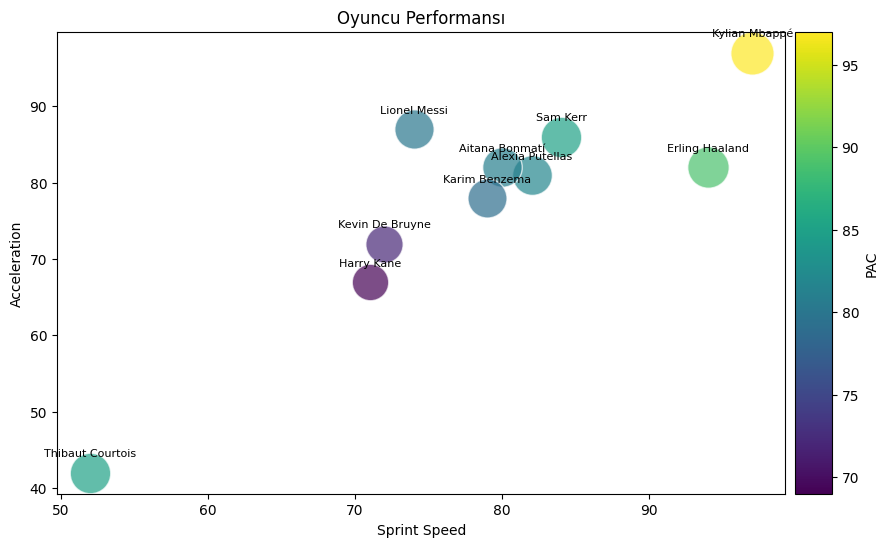

In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assume df1 is your DataFrame

# Kabarcık grafiği oluşturmak için
plt.figure(figsize=(10, 6))
norm = Normalize(vmin=df1['PAC'].min(), vmax=df1['PAC'].max())
cmap = plt.get_cmap('viridis')

# Renk çubuğunu ve boyut açıklamalarını eklemek için
sc = plt.scatter([], [], s=[], c=[], cmap=cmap, norm=norm, edgecolors='w', linewidth=1, label='PAC')

# Her bir oyuncuyu bir nokta olarak gösteren kabarcıkları oluşturun
for i in range(len(df1)):
    plt.scatter(df1['Sprint Speed'][i], df1['Acceleration'][i], s=df1['PAC'][i] * 10, alpha=0.7, c=[df1['PAC'][i]], cmap=cmap, norm=norm, edgecolors='w', linewidth=1, label='PAC')
    plt.annotate(df1['Player Name'][i], (df1['Sprint Speed'][i], df1['Acceleration'][i]), 
        textcoords="offset points", 
        xytext=(0, 10),  # Aşağıya doğru kaydırıldı
        ha='center',
        va='bottom',  # Yazıların alt kenara hizalanması
        fontsize=8)
    

# x ve y ekseni etiketlerini belirtmek için
plt.xlabel('Sprint Speed')
plt.ylabel('Acceleration')
plt.title('Oyuncu Performansı')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(sc, cax=cax, label='PAC')

plt.show()




In [17]:
df_all.isna().sum()

Positioning              0
Rank                     0
Player Name              0
OVR                      0
PAC                      0
SHO                      0
PAS                      0
DRİ                      0
DEF                      0
PHY                      0
Position                 0
Acceleration             0
Sprint Speed             0
Finishing                0
Shot Power               0
Long Shots               0
Volleys                  0
Penalties                0
Vision                   0
Crossing                 0
Free Kick Accuracy       0
Shot Passing             0
Long Passing             0
Curve                    0
Agility                  0
Balance                  0
Reactions                0
Ball Control             0
Detailed Dribbling       0
Composure                0
Interception             0
Heading Accuracy         0
Def Awareness            0
Standing Tackle          0
Sliding Tackle           0
Jumping                  0
Stamina                  0
S